## Basic classification: Classify images of hand written digits
https://github.com/jonkrohn/DLTFpT/blob/master/notebooks/shallow_net_in_tensorflow.ipynb

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2025-06-14 11:49:26.683424: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.16.2


### Import the MNIST dataset

In [2]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
class_names = ['zero', 'one', 'two', 'three', 'four',
                'five', 'six', 'seven', 'eight', 'nine']

### Explore the data

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images[0].shape

(28, 28)

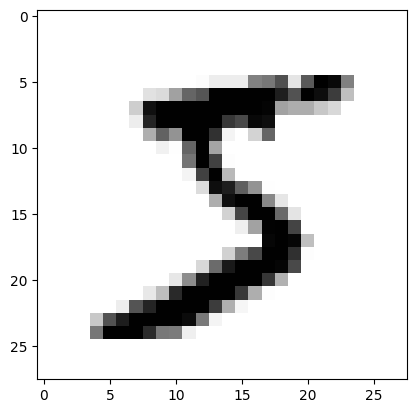

In [7]:
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels

In [ ]:
test_images.shape

In [ ]:
len(test_labels)

### Preprocess the data

In [ ]:
plt.figure()
plt.imshow(train_images[0],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

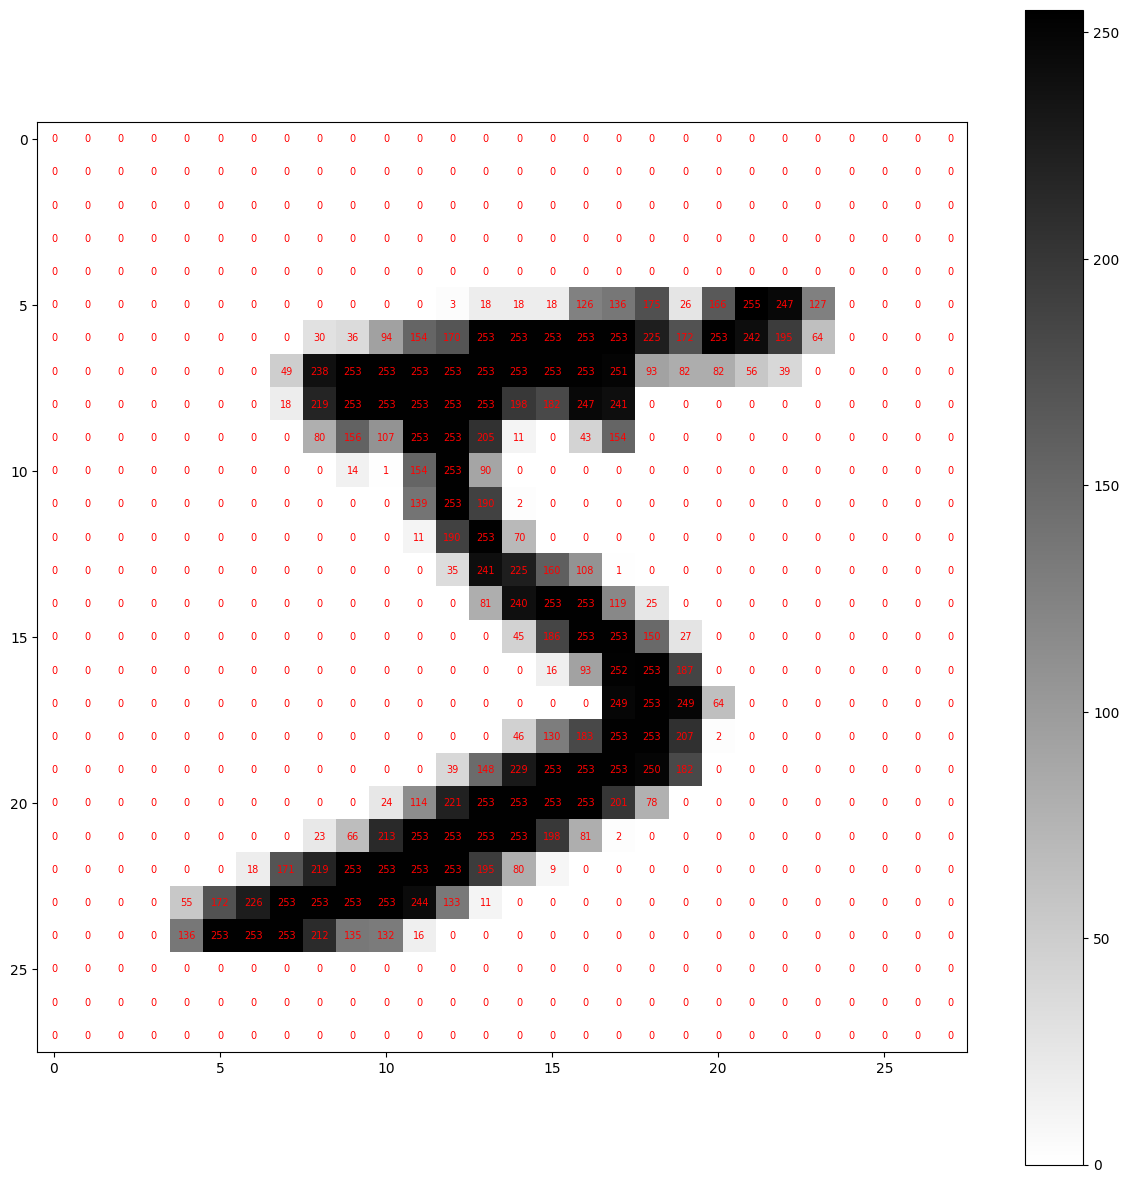

In [25]:
# Select an image (e.g., the first image)
img = train_images[0]

plt.figure(figsize=(15, 15))
plt.imshow(img, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)

# Overlay pixel values
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        plt.text(j, i, f"{img[i, j]}", ha='center', va='center', color='red', fontsize=7)

plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#train_images = train_images.reshape(60000, 784).astype('float32')
#test_images = test_images.reshape(10000, 784).astype('float32')

In [ ]:
n_classes = 10
train_labels = tf.keras.utils.to_categorical(train_labels, n_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, n_classes)

In [ ]:
train_images.shape

## Build the model
### Set up the layers

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
(64*784)

In [ ]:
(64*784)+64

In [ ]:
(10*64)+10

### Compile the model

In [ ]:

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])

### Train the model
#### Feed the model

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=100, verbose=1, validation_data=(test_images, test_labels))

#### Evaluate accuracy

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

### Make predictions

In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

In [ ]:
np.argmax(predictions[0])

In [ ]:
test_labels[0]

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  true_label_int = np.argmax(true_label)  # Fix: get integer label

  if predicted_label == true_label_int:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label_int]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  true_label_int = np.argmax(true_label)  # Fix: get integer label

  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label_int].set_color('blue')

#### Verify predictions

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Use the trained model

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])